# Time Series Forecasting 
Time Series is generally a data which is collected over time and is dependent on it. It is simply a series of datapoints ordered in time.
## Components of a Time Series
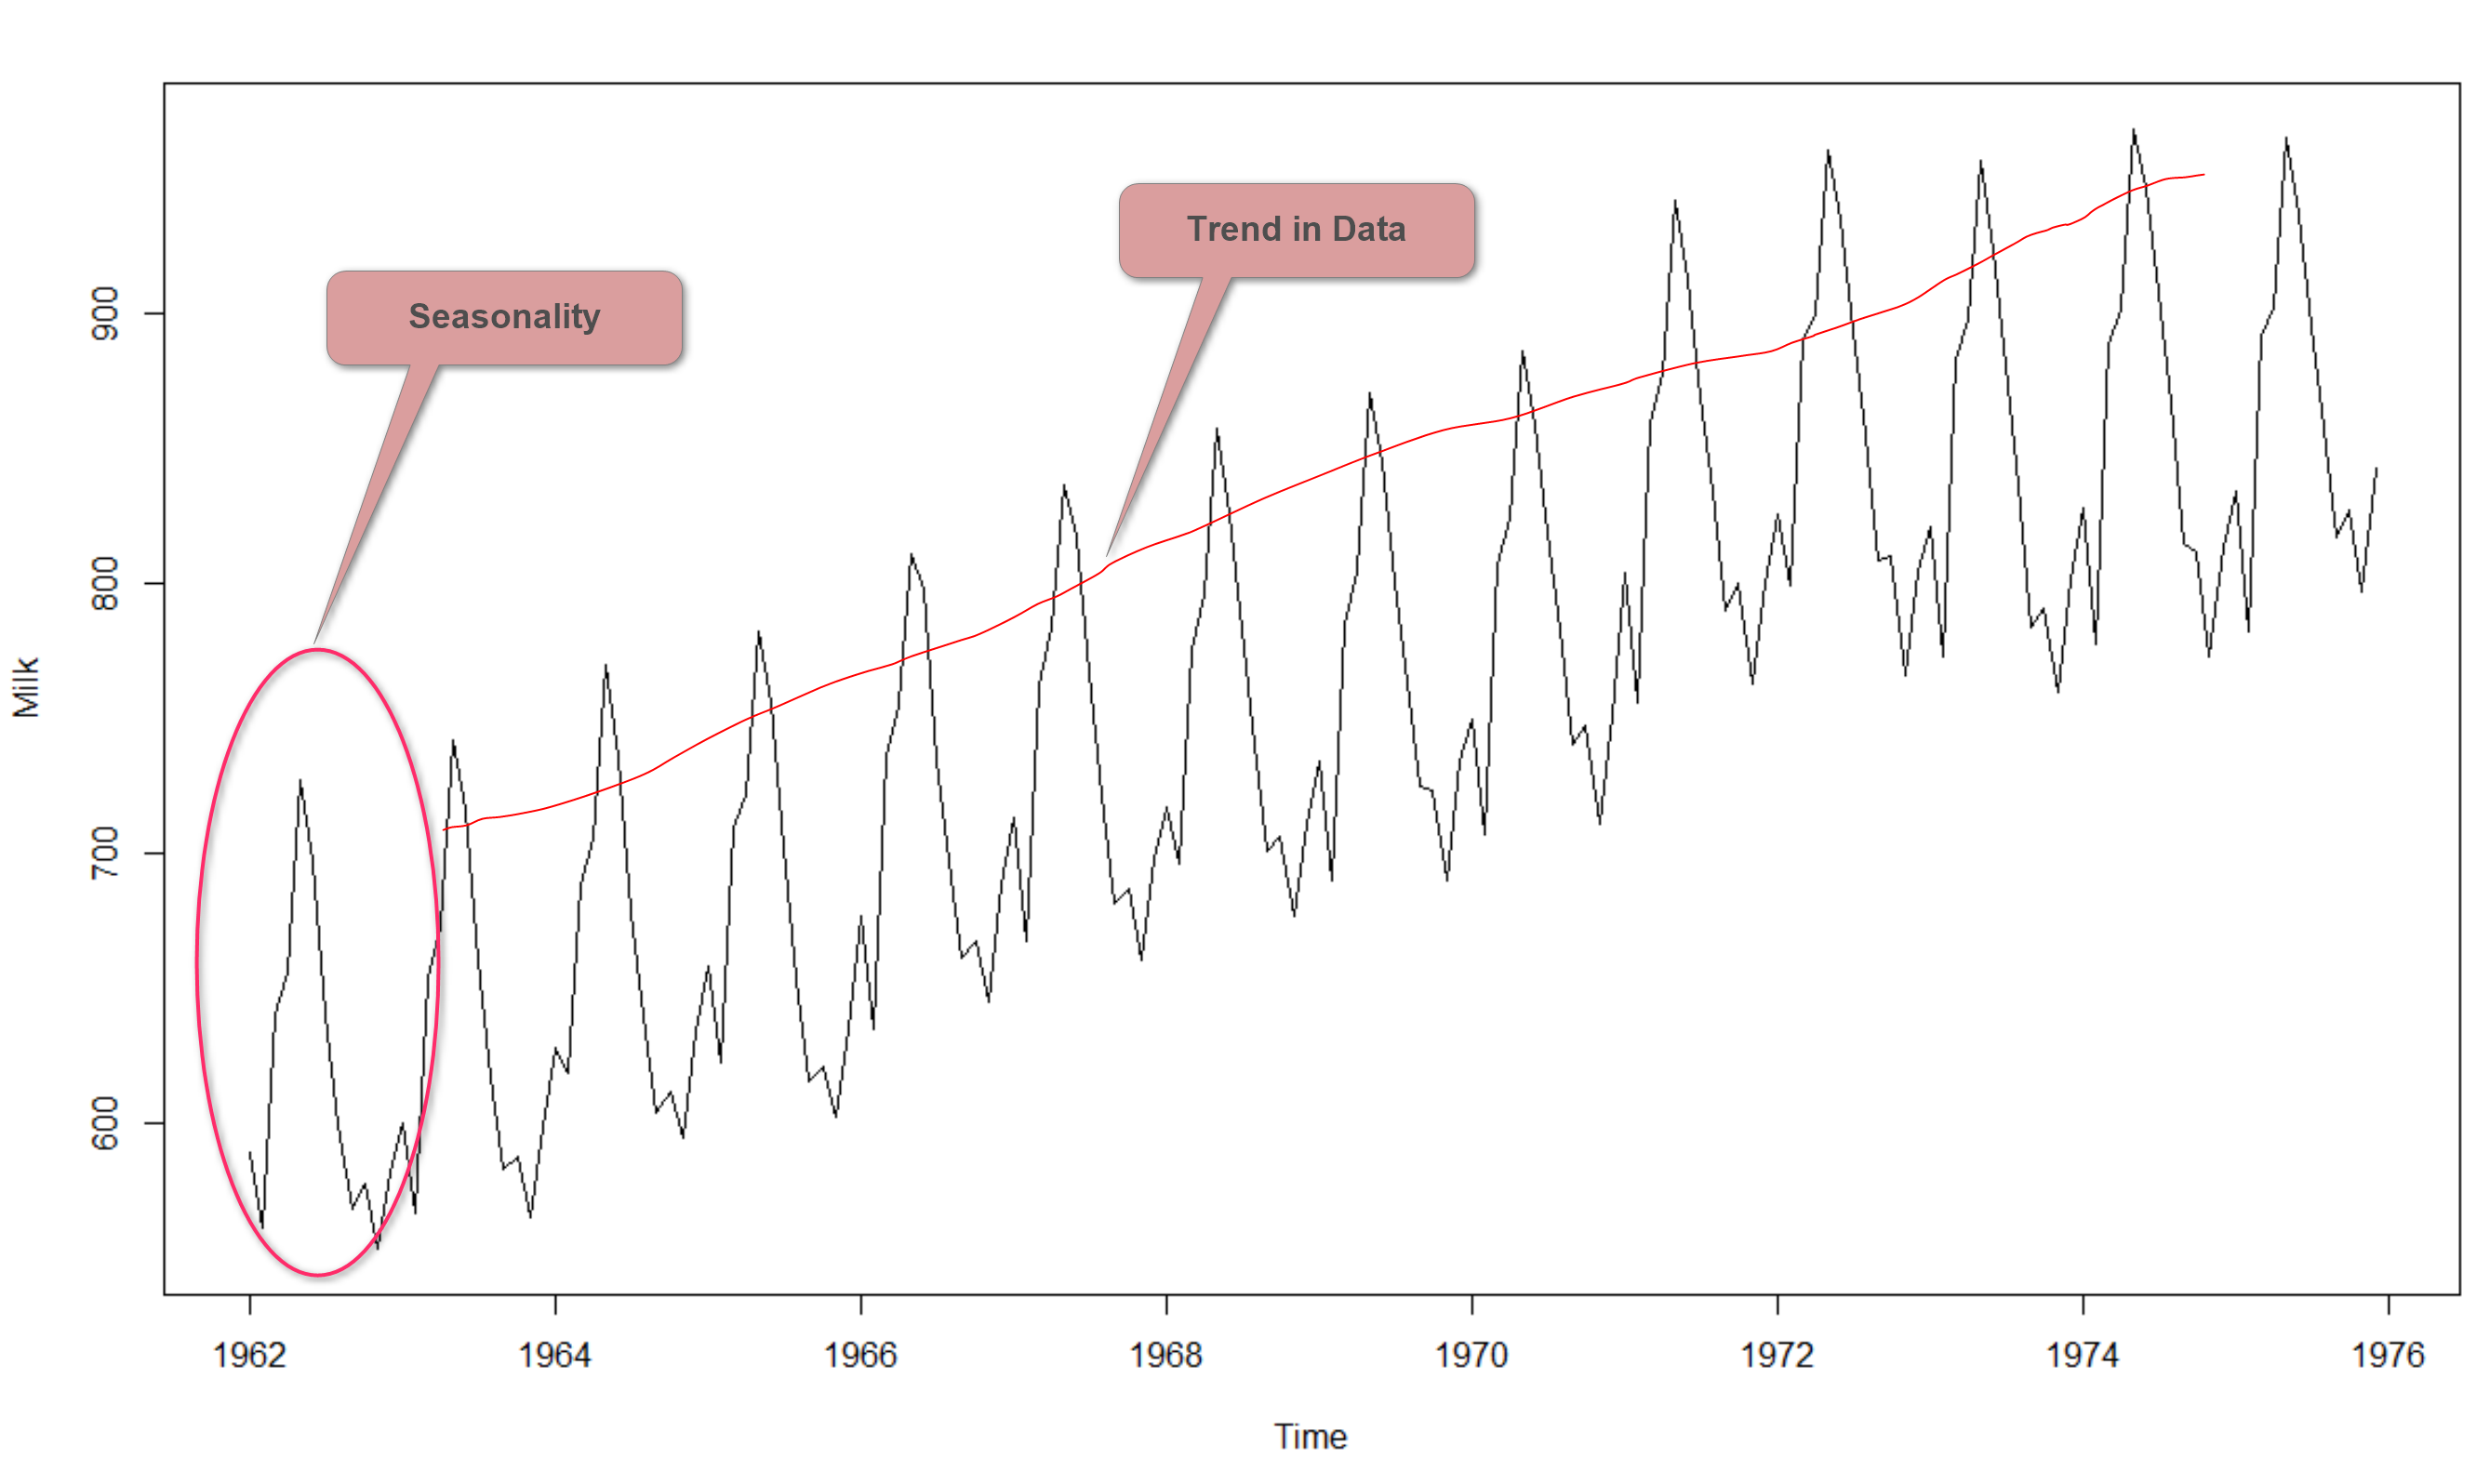
**1) Trend**
    We can define change as a general direction in which a specific thing develops or changes. 
A trend can be increasing or decreasing. Example: We can see an increasing trend in the population of India over time.


**2) Seasonality**
    The repetition of a pattern at regular intervals of time is called Seasonality.
    
## General Approach to Time Series 
**1) Hypothesis Generation**
    This is done before taking a look at the data. We generate a hypothesis based on all all the previous knowledge we have about the data. This helps in generalization about which variables will really affect the forecast and how will it affect. 
**2) Data Analysis and Hypothesis Verfication**
     We now explore the data, analyse it and check whether our hypothesis holds true based on our analysis. 
**3) Forecasting**
    We now have a hypothesis and we have analyzed the data. We will now move on to the forecasting using various methods. 
### Forecasting using various statistical methods   
    The traditional statistical methods used for Time Series are:
**1) AutoRegressive Model(AR)**
    It is a time series model that uses observations from previous time steps as input to make predictions for future. The autoregressive model specifies that the output variable depends linearly on its own previous values.
    
    
**2) Moving Average Model(MA)**
    Rather than using past values of the forecast variable in a regression, a moving average model uses past forecast errors in a regression-like model.
    yt=c+εt+θ1εt−1+θ2εt−2+⋯+θqεt−q,
where εt is white noise. We refer to this as an MA(q) model, a moving average model of order q. Of course, we do not observe the values of εt, so it is not really a regression in the usual sense.


**3) Simple Exponential Smoothing(SES)**
    Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality.
    
    
**4) AutoRegressive Intergrated Moving Average Model(ARIMA)**
    In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.

## Now we'll see the implementation of these models on a Time Series Data using Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("Train_SU63ISt.csv") 

In [3]:
#Preserving original dataframes
train_or = train.copy()

In [4]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [6]:
#Converting Datetime to dtype datetime
train['Datetime'] = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')

In [7]:
train['Datetime'].head()

0   2012-08-25 00:00:00
1   2012-08-25 01:00:00
2   2012-08-25 02:00:00
3   2012-08-25 03:00:00
4   2012-08-25 04:00:00
Name: Datetime, dtype: datetime64[ns]

In [8]:
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [9]:
#Extracting day, month, year and hour into different columns
for i in (train):
    i['day'] = i.Datetime.dt.day
    i['month'] = i.Datetime.dt.month
    i['year'] = i.Datetime.dt.year
    i['hour'] = i.Datetime.dt.hour

In [10]:
#Extracting Day of the Week
train['day of week'] = train.Datetime.dt.dayofweek

In [11]:
#Function to find whether it is weekend
def weekend(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0

In [12]:
#Adding is weekend Column
temp = train['Datetime'].apply(weekend)
train['isweekend'] = temp

In [13]:
train.head()

,ID,Datetime,Count,day,month,year,hour,day of week,isweekend
0,0,2012-08-25 00:00:00,8,25,8,2012,0,5,1
1,1,2012-08-25 01:00:00,2,25,8,2012,1,5,1
2,2,2012-08-25 02:00:00,6,25,8,2012,2,5,1
3,3,2012-08-25 03:00:00,2,25,8,2012,3,5,1
4,4,2012-08-25 04:00:00,2,25,8,2012,4,5,1


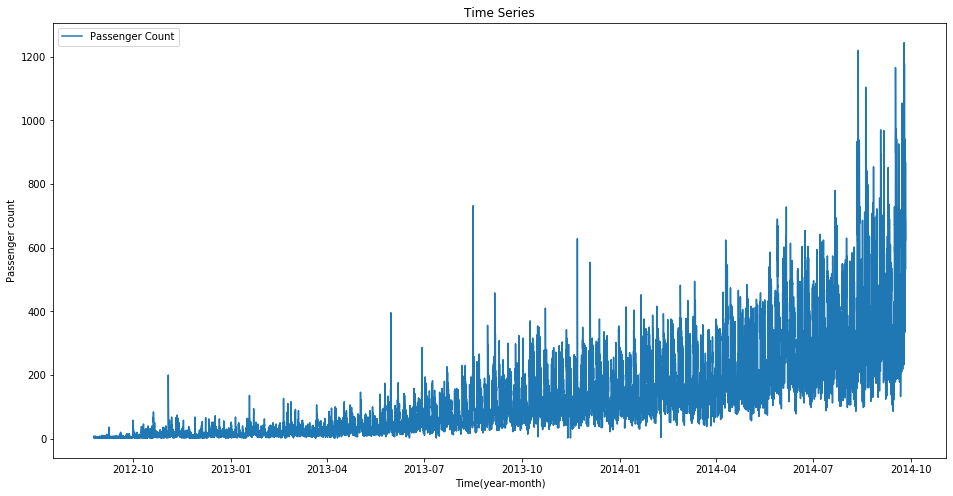

In [14]:
#Looking at the entire time series
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',axis=1)           # drop ID variable to get only the Datetime on x-axis. 
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

## Exploratory Data Analysis

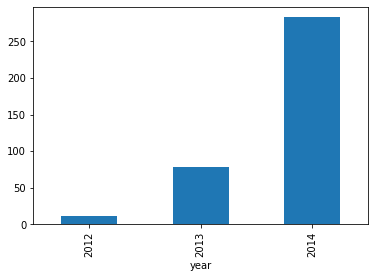

In [15]:
#Analysing count according to year
train.groupby('year')['Count'].mean().plot.bar()

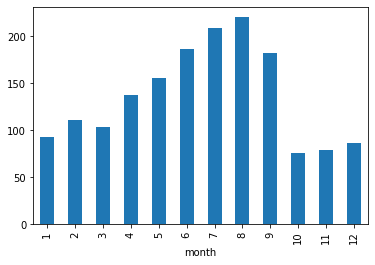

In [16]:
#Analysing count according to month
train.groupby('month')['Count'].mean().plot.bar()

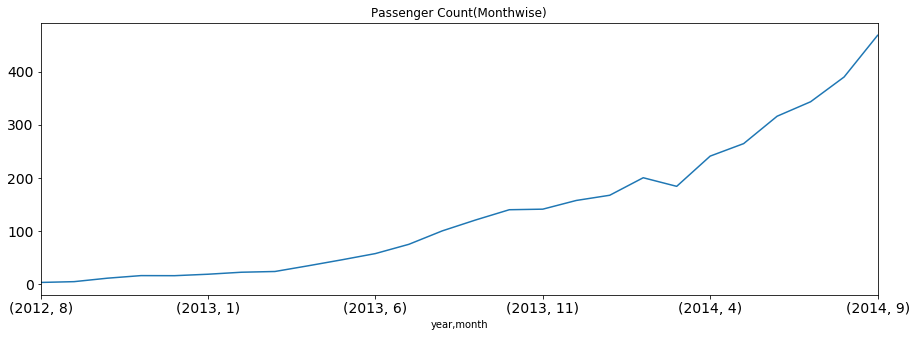

In [17]:
#Monthly count each month according to each year
temp1=train.groupby(['year', 'month'])['Count'].mean() 
temp1.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

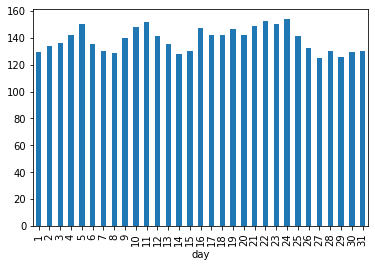

In [18]:
#Daily mean of passengers according to each day of the month
train.groupby('day')['Count'].mean().plot.bar()

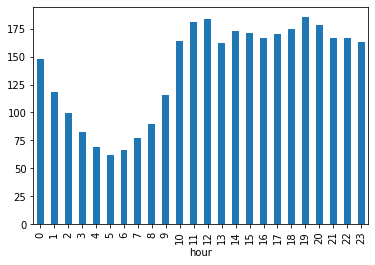

In [19]:
#Hourwise mean 
train.groupby('hour')['Count'].mean().plot.bar()

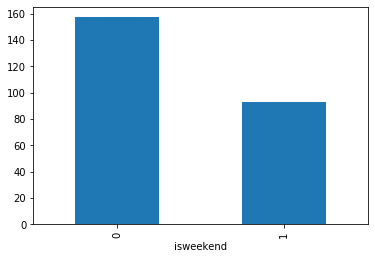

In [20]:
#Count mean on Weekends and weekdays
train.groupby('isweekend')['Count'].mean().plot.bar()

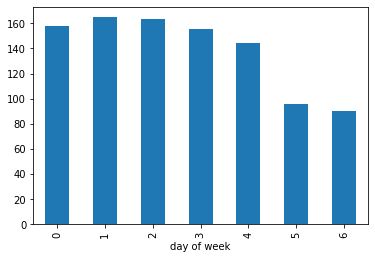

In [21]:
#According to day of the week
train.groupby('day of week')['Count'].mean().plot.bar()

In [22]:
train=train.drop('ID',axis=1)

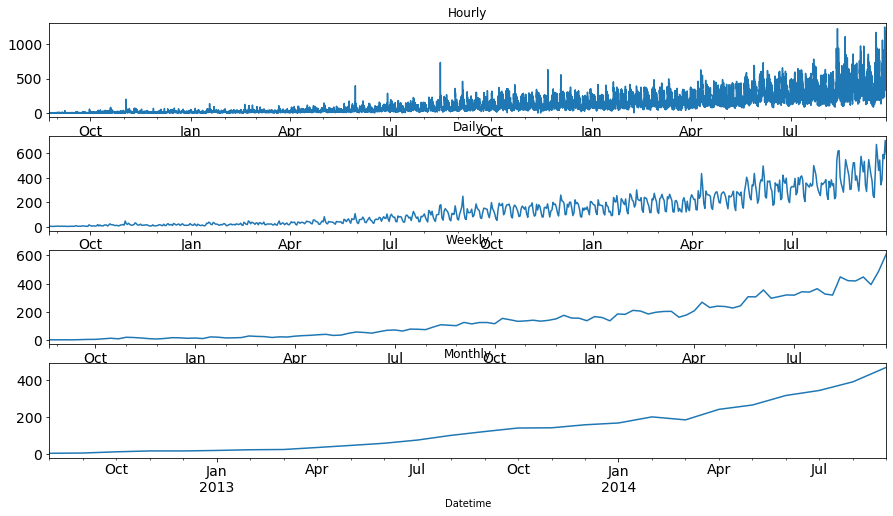

<Figure size 432x288 with 0 Axes>

In [23]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()
#Let’s look at the hourly, daily, weekly and monthly time series.

fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()
plt.tight_layout()

In [24]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()

In [25]:
#Partitioning the data into training and validation parts
Train=train.ix['2012-08-25':'2014-06-24'] 
valid=train.ix['2014-06-25':'2014-09-25']

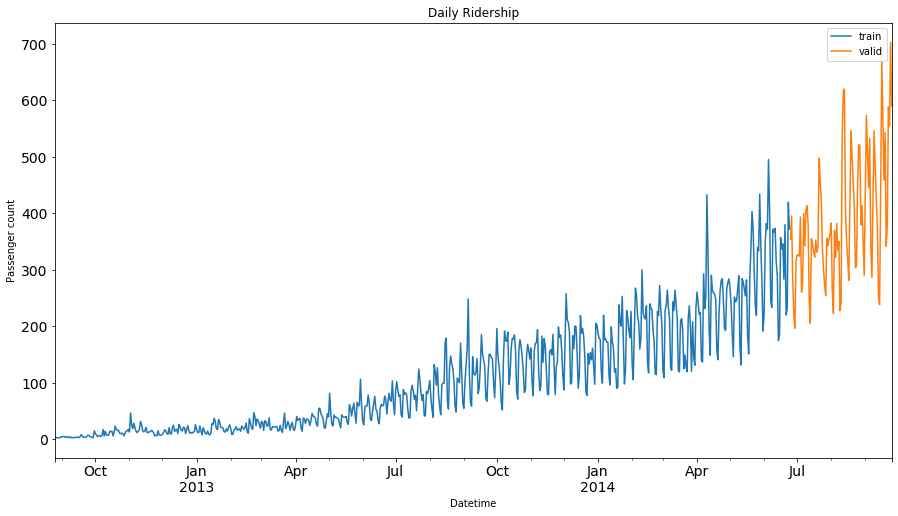

In [26]:
#Plotting the training and vaidation data
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

# Models used for Time Series prediction are:

### 1) Naive Approach:
        In this forecasting technique, we assume that the next expected point is equal to the last observed point.

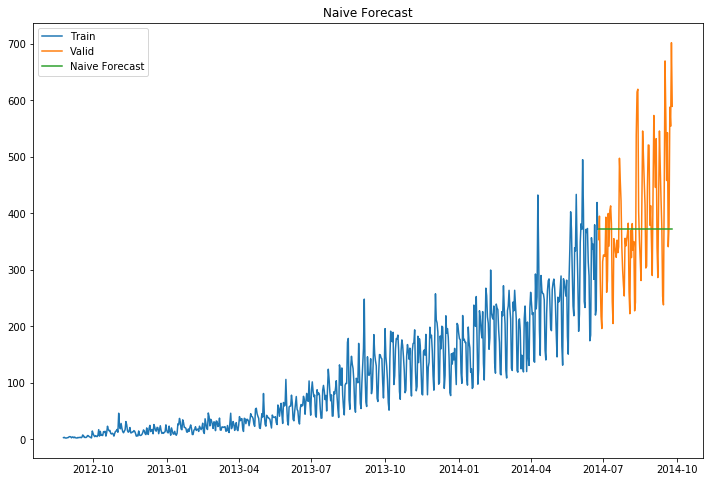

In [27]:
dd= np.asarray(Train.Count) 
y_hat = valid.copy() 
y_hat['naive'] = dd[len(dd)-1] 
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index,valid['Count'], label='Valid') 
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

### 2) AutoRegressive Model(AR):
        In this model, y(t) depends only on past values y(t-1), y(t-2), etc. 
#### y(t) = f(y(t-1), y(t-2), y(t-3),....)
#### General equation for this model would be Y(t) = b0 + b1*Y(t-1) + b2*Y(t-2) + ....
It works well when there is high correlation between past and current values

In [28]:
Train.head()

,Count,day,month,year,hour,day of week,isweekend
Datetime,,,,,,,
2012-08-25,3.166667,25.0,8.0,2012.0,11.5,5.0,1.0
2012-08-26,3.666667,26.0,8.0,2012.0,11.5,6.0,1.0
2012-08-27,2.583333,27.0,8.0,2012.0,11.5,0.0,0.0
2012-08-28,2.416667,28.0,8.0,2012.0,11.5,1.0,0.0
2012-08-29,2.500000,29.0,8.0,2012.0,11.5,2.0,0.0


In [29]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(Train['Count'], dates=Train.index)
model_ar_fit = model_ar.fit()

In [30]:
predictions = model_ar_fit.predict(start='2014-06-25', end='2014-09-25')

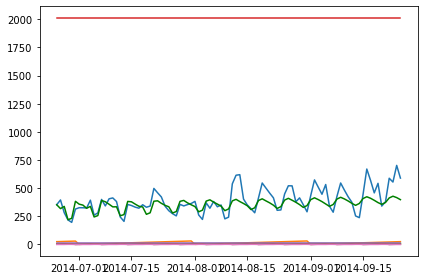

In [31]:
plt.plot(valid)
plt.plot(predictions,color='green')
plt.tight_layout()

### 3) Moving Average(MA):
    It depends only on the random errors.
#### Y(t) = f(e(t), e(t-1), e(t-2), ...)
 

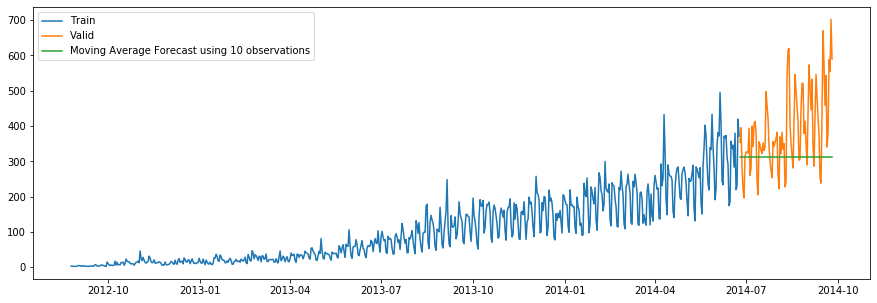

In [32]:
# If we try rolling mean for past 10 days
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 

### 4) Simple Exponential Smoothing:
         In this technique, we assign larger weights to more recent observations than to observations from the distant past.
        The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.
        If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

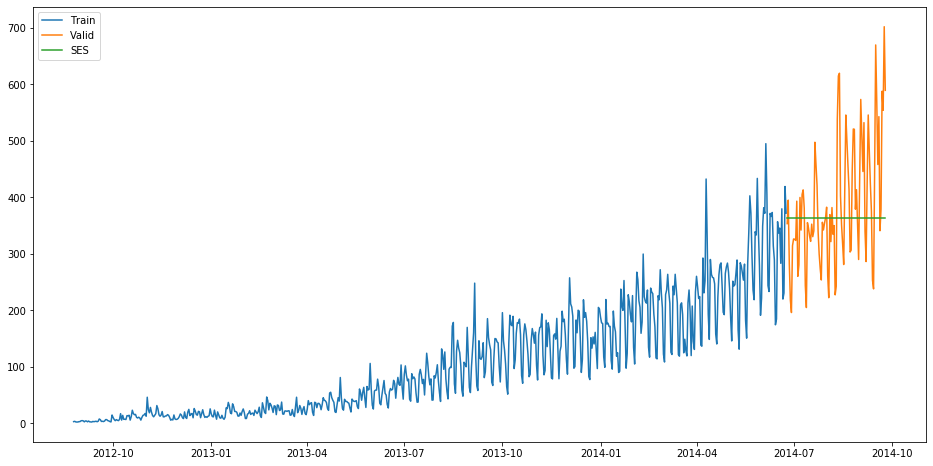

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 
y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

### 5) ARIMA:
    It stands for AutoRegression Integrated Moving Average.
**It is specified by three ordered parameters (p,d,q):**

> * p : the order of the autoregressive model(number of time lags).
> * d : the degree of differencing(number of times the data has had past values subtracted).
> * q : the order of moving average model. We will discuss more about these parameters in next section.

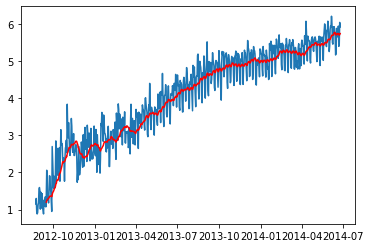

In [34]:
# To make model stationary we remove trend and seasonality
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])
moving_avg = Train_log.rolling(24).mean()  
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [35]:
#There is an increasing trend so, remove it
train_log_moving_avg_diff = Train_log - moving_avg

In [36]:
#Since the average was taken for 24 values, drop the first 23 NULL values
train_log_moving_avg_diff.dropna(inplace = True) 

In [37]:
#Stabalize the mean of the Time Series by one shift
train_log_diff = Train_log - Train_log.shift(1) 

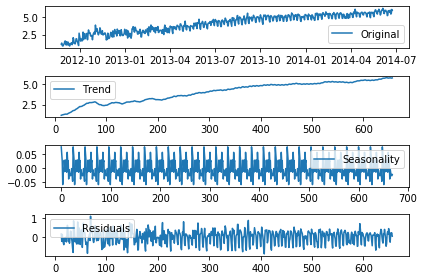

In [38]:
#Remove Seasonality
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

In [39]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 

### Forecasting by fitting the ARIMA model on the Time Series

In [40]:
#Finding the best values of (p, d, q) using AutoCorrelationFunction(ACF) and Partial ACF(PACF) graphs
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=25, method='ols')

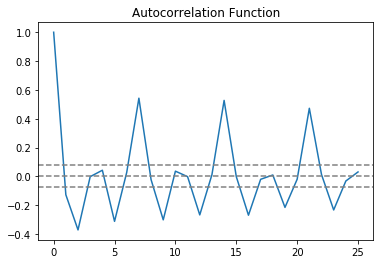

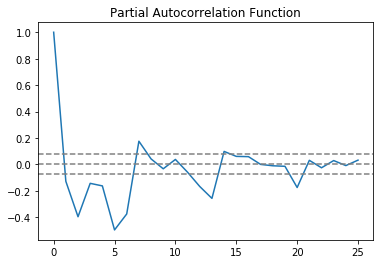

In [41]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

## Just AR Model

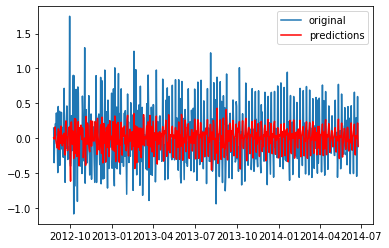

In [42]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

## Just MA Model

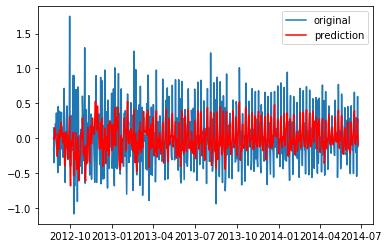

In [43]:
model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

## Combined( ARIMA)

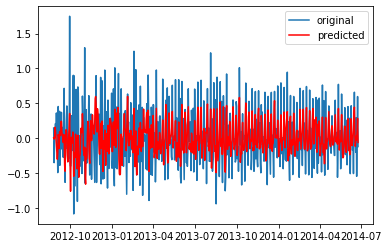

In [44]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()